<a href="https://colab.research.google.com/github/roberto-paixao/Analise_Airbnb_Toquio/blob/main/Analise_de_Dados__Airbnb_T%C3%B3quio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Airbnb-logo" width="450" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/airbnb_logo.jpg">

---

# Análise dos Dados do Airbnb - Tóquio


O [Airbnb](https://www.airbnb.com.br/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem, fundada em 2008, a empresa hoje possui um valor estimado de mais de 1 bilhão de dólares. A  plataforma já se tornou a solução ideal para quem prefere se hospedar em uma casa, apartamento e entre vários tipos de acomodações disponíveis em seu catálogo.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/airbnb-logo_pequeno.jpg">

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tóquio, e ver quais insights podem ser extraídos a partir de dados brutos.**
<br><br>

<img alt="Tokyo-shibuya" width="700" height="350" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/shibuya-crossing-toquio.jpg">




# **Tóquio, Japão**


A região metropolitana de Tóquio possui aproximadamente *37 milhões de habitantes*, o maior aglomerado urbano do mundo, é constituída por *23 bairros, 26 municípios adicionais e as ilhas Izu e Ogasawara*.

Tóquio possui diversos pontos turísticos, como *Meiji* e *Senso-ji* (ambos são santuários famosos), templos budistas, parques, jardins (*Ueno e Yoyogi*).

Em 2019, o país registrou o seu oitavo crescimento no número de visitantes, chegando a *31,8 milhões*, esse número representa um aumento de 467% em um década, saindo de *7 milhões* para quase *32 milhões* de visitantes.

---

## Obtenção dos Dados

Os dados foram coletados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta análise inicial, usaremos o arquivo:
* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*

O arquivo `listing.csv` é uma versão resumida de um dataset maior, com mais atributos (*features*). Entretanto, para uma análise inicial, a versão resumida servirá ao nosso propósito.

O dicionário de dados a seguir, facilitará o entendimento sobre a informação de cada atributo:

**Dicionário das variáveis**

|Atributo|Descrição|
| --- |---|
| id | Número de id gerado para identificar o imóvel
| name | Nome da propriedade anunciada
| host_id | Número de id do proprietário (anfitrião) da propriedade
| host_name | Nome do anfitrião
| neighbourhood_group | Grupo no qual o bairro pertence
| neighbourhood | Nome do bairro
| latitude | Coordenada da latitude da propriedade
| longitude | Coordenada da longitude da propriedade
| room_type | Informa o tipo de quarto que é oferecido
| price | Preço para alugar o imóvel
| minimum_nights | Quantidade mínima de noites para reservar
| number_of_reviews | Número de reviews que a propriedade possui
| last_review | Data do último review
| reviews_per_month | Quantidade de reviews por mês
| calculated_host_listings_count | Quantidade de imóveis do mesmo anfitrião
| availability_365 | Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a "cara" do nosso *dataset*, analisando as 5 primeiras e últimas entradas.


## Análise dos Dados

Usaremos as bibliotecas:
- `pandas` - Geração e manipulação de DataFrames.
- `numpy` - Manipulação de valores numéricos.
- `matplotlib` e `seaborn` - Visualização de Dados.
- `folium` - Criação de mapas interativos.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

 # Configurações de gráficos

sns.set()
sns.set_style("white")
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-01-27/visualisations/listings.csv")

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.45,1,328
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7272,3,228,2020-01-18,2.29,1,138
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.96,2,180
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,11000,1,211,2020-03-16,2.22,1,139
4,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74253,139.79730,Private room,30000,1,72,2018-06-17,0.76,2,271


In [4]:
# Mostra as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11384,47850371,悠1R4PW-7 新築駅至近交通便利/高速インターネット・テレワーク便利/成田･羽田からアク...,382078501,Yuyu1R4PW,NaN,Katsushika Ku,35.73622,139.84686,Entire home/apt,2629,1,0,NaN,NaN,8,53
11385,47850441,悠1R4PW-8 新築駅至近交通便利/高速インターネット・テレワーク便利/成田･羽田からアク...,382078501,Yuyu1R4PW,NaN,Katsushika Ku,35.73825,139.84692,Entire home/apt,2629,1,0,NaN,NaN,8,52
11386,47861822,高級料亭のような雰囲気の宿。駅徒歩１分。約24帖の共用LDK。無料Wi-Fi、床暖房、ワイン...,333093782,川口,NaN,Ota Ku,35.56162,139.70128,Private room,4000,1,0,NaN,NaN,3,88
11387,47878663,３＊＊スカイツリー徒步4分 テレワーク最適,21504159,Michi,NaN,Sumida Ku,35.71147,139.81729,Entire home/apt,3120,14,0,NaN,NaN,23,78
11388,47878835,1＊＊スカイツリー徒步4分 テレワーク最適,21504159,Michi,NaN,Sumida Ku,35.70978,139.81764,Private room,3131,14,0,NaN,NaN,23,79


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Ver quais os tipos das variáveis que estão presentes no dataset nos mostrará se há algum atributo com o tipo incorreto ou diferente do normal para aquele tipo de atributo.

In [5]:
# Identificar o volume de dados do DataFrame
observacoes = df.shape[0]
atributos = df.shape[1]

print("Observações:\t",observacoes)
print("Atributos:\t", atributos,"\n")

# Tipos de variáveis do DataFrame
df.dtypes

Observações:	 11389
Atributos:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É muito importante verificar a quantidade de valores ausentes em um _dataset_ pois dependendo da proporção de dados faltantes, pode ser um problema ter uma *feature* com muitos dados faltantes, veremos isso agora:



In [6]:
df.isnull().mean().sort_values(ascending=False).round(4)*100

neighbourhood_group               100.00
reviews_per_month                  18.97
last_review                        18.97
host_name                           0.19
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
name                                0.00
id                                  0.00
dtype: float64

A função a seguir criará um gráfico que ajudará a visualizar melhor essa porcentagem faltante.

In [7]:
def porcentagem_faltante(df):
    figsize(10,8)
    ax, fig = plt.subplots()

    missing_percent = df.isnull().mean().sort_values(ascending=False).round(3)*100

   
    
    # Plot
    splot = sns.barplot(missing_percent.values, missing_percent.index, orient='h', color='SteelBlue');

    for p in splot.patches:
        width=p.get_width()

        if width <= 0.1:

            plt.text(p.get_width()+2.5, p.get_y()+0.55*p.get_height(),
                        '{}%'.format(width),
                        ha='center', va='center', color='lightgrey', size=12)
        
        elif width > 0.1 and width <= 0.2:
            plt.text(p.get_width()+2.5, p.get_y()+0.55*p.get_height(),
                        '{}%'.format(width),
                        ha='center', va='center', color='grey', size=12)
        
        else:
            plt.text(p.get_width()-5, p.get_y()+0.55*p.get_height(),
                        '{}%'.format(width),
                        ha='center', va='center', color='white', size=12, fontweight='light')

           
            
    fig.set_title('Porcentagem Faltante (%)\n', size=20, color='grey', loc='left')
    plt.xticks([], color='white')
    sns.despine(left=True, bottom=True);
    plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


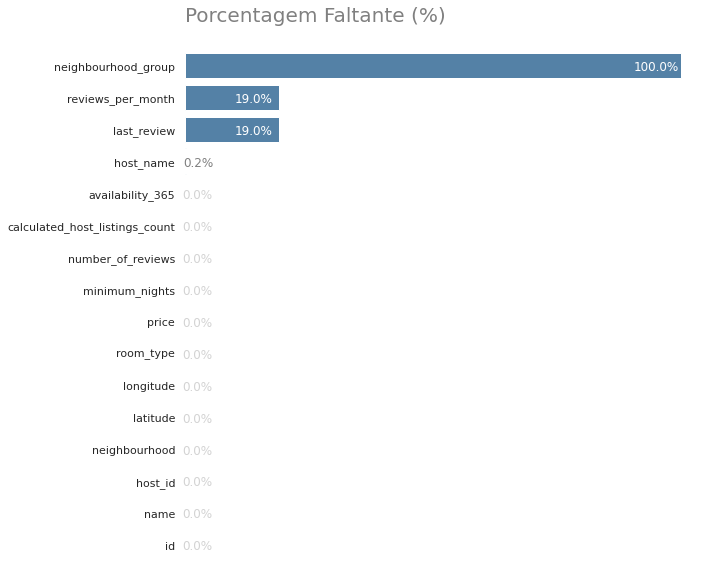

In [8]:
porcentagem_faltante(df)

Com base nos valores obtidos, podemos afirmar que:
* A feature `neighbourhood_group` está totalmente sem valor algum.
* As features `reviews_per_month` e `calculated_host_listing_count` estão com aproximadamente 19% dos dados faltantes.
* A feature `last_review` possui aproximadamente 0,2% de dados faltantes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


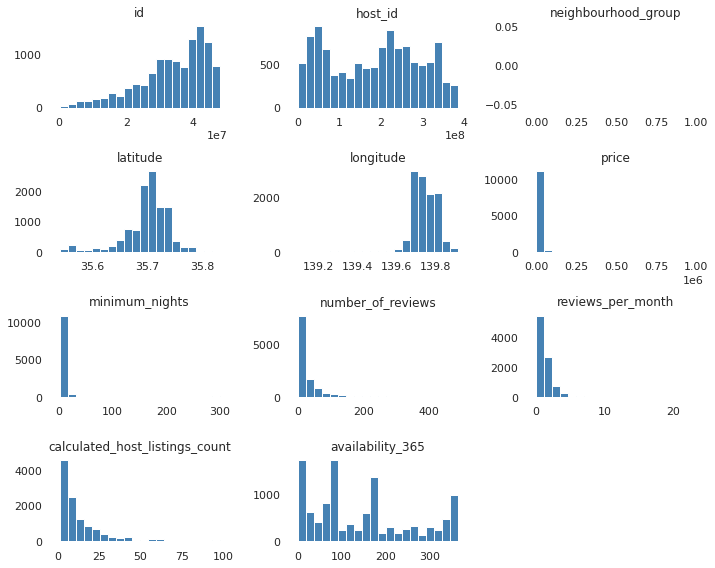

In [9]:
# plotar o histograma das variáveis numéricas
fig, ax = plt.subplots()

df.hist(figsize=(25,15), bins=20, color="Steelblue", grid=False, ax=ax);

sns.set_style('white')
sns.despine(left=True, bottom=True)

plt.tight_layout()

As _features_ (atributos) `neighbourhood_group` (vazia), `price`, `minimum_nights` e `calculated_host_listings_count` aparentam possuir outliers pois não apresentem uma distribuição bem definida.

### **Q4. Há *outliers* presentes?**

Olhando o histograma acima, é possível observar que as *features* `price`, `minimum_nights` e `calculated_host_listings_count` não seguem uma distribuição, o que pode indicar a presença de *outliers*.<br>
Para confirmar sua presença, há duas maneiras de identificá-los:
* O método `describe()` do `pandas`, mostra um resumo estatístico do DataFrame.
* Uso do gráfico do tipo `boxplot` para a variável.
* Calcular o IQR (_Intervalo Interquartil_) que servirá para definir os limites inferiores e superiores e identificar os _outliers_.

**Para o foco desta análise, iremos apenas tratar das _features_** `price`, `minimum_nights_`.

In [10]:
# Resumo Estatístico do DataFrame
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11389.000000,11389.000000,11389.000000,9228.000000,11389.000000,11389.000000
mean,11981.453683,3.758539,26.097375,1.219632,12.799807,146.416542
std,31289.740038,17.642326,41.181398,1.152064,15.054536,115.123767
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,4000.000000,1.000000,1.000000,0.420000,3.000000,58.000000
50%,6571.000000,1.000000,10.000000,0.990000,7.000000,120.000000
75%,12000.000000,2.000000,34.000000,1.680000,17.000000,221.000000
max,1000000.000000,300.000000,488.000000,23.380000,98.000000,365.000000


As *features* `id` e `host_id` não foram selecionadas para o resumo por se tratarem de atributos de identificação, que não influenciariam em nada.

Na *feature* `price`, a moeda está em *Iene*, para efeitos de comparações futuras, converteremos em *Real* seguindo a fórmula com a cotação atual do Iene do dia 03/03/2021.

* __1 Real = 18.65 Ienes japonês__ ou  __0.054 Iene = 1 Real brasileiro__



In [11]:
# Conversão da feature 'price'
# De Iene japonês para Real brasileiro

df['price'] = df['price'] / 18.65

In [12]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11389.000000,11389.000000,11389.000000,9228.000000,11389.000000,11389.000000
mean,642.437195,3.758539,26.097375,1.219632,12.799807,146.416542
std,1677.734050,17.642326,41.181398,1.152064,15.054536,115.123767
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,214.477212,1.000000,1.000000,0.420000,3.000000,58.000000
50%,352.332440,1.000000,10.000000,0.990000,7.000000,120.000000
75%,643.431635,2.000000,34.000000,1.680000,17.000000,221.000000
max,53619.302949,300.000000,488.000000,23.380000,98.000000,365.000000


Observando o resumo estatístico, vemos que:
* O atributo `price` possui 75% dos valores abaixo de R\$642.43 (*valor convertido*) enquanto o seu máximo é R$53.619,30.
* A média de `minimum_nights` é de 3.75 enquanto sua máxima é 300.
* 75% dos valores em `minimum_nights` estão abaixo de 2.
* O valor mínimo de `price` é 0, o que pode significar um erro de digitação ou outro tipo de problema, como por exemplo, o anfitrião só dirá o valor quando o possível hóspede entrar em contato.


#### Identificando e Removendo _outliers_

Existem diversas maneiras de tratar _outliers_ mas para esta análise, usaremos o IQR Score, que define limites de valores superiores e inferiores para a variável em questão.

<p><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

A fórmula para definir o intervalo interquartil:

    IQR = Q3 - Q1

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

Já para calcular os limites inferiores e superiores, usamos a seguinte fórmula:


- Limite inferior:  **Q1 - 1.5 * IQR**

- Limite superior:  **Q3 + 1.5 * IQR**

  
<br>

Primeiro, precisamos identificar o `Q1` e `Q3` para os atributos `price` e `minimum_nights`.

O `pandas` possui o método `.quantile()` que retorna o quantil desejado de determinada variável, facilitando o nosso trabalho em descobrir essa informação.
<br><br>

**IQR de `price`**

In [13]:
# IQR de price

q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

print('IQR de price:',IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite Superior',sup_price)
print('Limite Inferior',inf_price)


IQR de price: 428.9544235924933
Limite Superior 1286.86327077748
Limite Inferior -428.9544235924933


**Boxplot de `price`.**

Definidos o IQR, limite superior e inferior de `price`, com o `boxplot` visualizaremos melhor as discrepâncias (_outliers_) dos dados.

Preço acima de R$1286.86
963 observações
8.46%

Preço <= 0
1 observações
0.01%


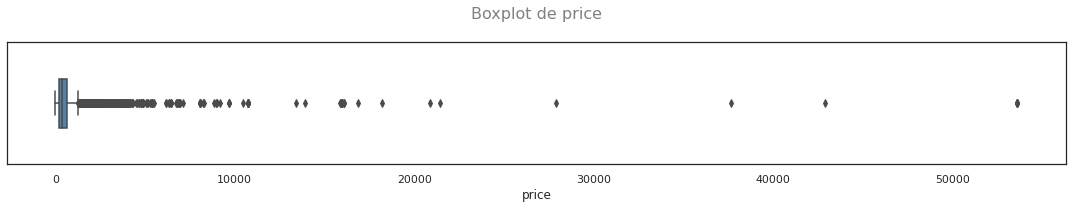

In [14]:
# Selecionando o atributo 'price' e gerando o boxplot
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df['price'], width=0.4, color='SteelBlue', ax=ax)
ax.set_title('Boxplot de price\n', size=16, color='grey')

sns.set_style('white')
plt.tight_layout()

# Quantidade de valores(%) em 'price' acima de R$1286.86
print("Preço acima de R$1286.86")
print("{} observações".format(len(df[df.price > 1286.86])))
print("{:.2f}%".format((len(df[df.price > 1286.86]) / df.shape[0])*100))

# Quantidade de valores(%) em 'price' menor ou igual a R$0.00
print("\nPreço <= 0")
print("{} observações".format(len(df[df.price <= 0])))
print("{:.2f}%".format((len(df[df.price <= 0]) / df.shape[0])*100))

**IQR de `minimum_nights`.**

In [15]:
# IQR de minimum_nights

q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

print("IQR de minimum_nights:", IQR_minimum_nights)

sup_min_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_min_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print("Limite Superior:",sup_min_nights)
print("Limite Inferior:",inf_min_nights)

IQR de minimum_nights: 1.0
Limite Superior: 3.5
Limite Inferior: -0.5


**Boxplot de `minimum_nights`.**

minimum_nights - acima de 3.5 dias:
1043 observações
9.16%


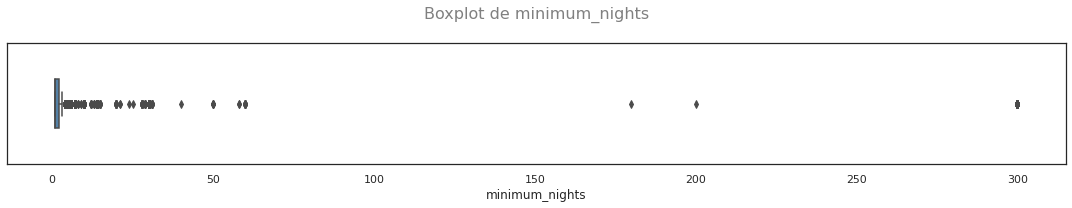

In [16]:
# Selecionando o atributo 'minimum_nights' e gerando um boxplot

fig, ax = plt.subplots(figsize=(15,3))
sns.boxplot(x=df['minimum_nights'], width=0.4, color='SteelBlue', ax=ax)
ax.set_title('Boxplot de minimum_nights\n', size=16, color='grey')
plt.tight_layout()

# Quantidade de valores(%) em 'minimum_nights' acima de 2 dias
print("minimum_nights - acima de 3.5 dias:")
print("{} observações".format(len(df[df.minimum_nights > 3.5])))
print("{:.2f}%".format((len(df[df.minimum_nights > 3.5]) / df.shape[0])*100))


Identificados os *outliers* de `price` e `minimum_nights`, então é hora de removê-los e checar novamente o histograma.

In [17]:
# Copiando o DataFrame e removendo os outliers
df_clean = df.copy()

# Deletando os outliers
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_min_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# Removendo a feature que está sem dados.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#### Histogramas sem *outliers*


Veremos como ficaram a distribuição dessas variáveis depois da remoção dos _outliers_.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


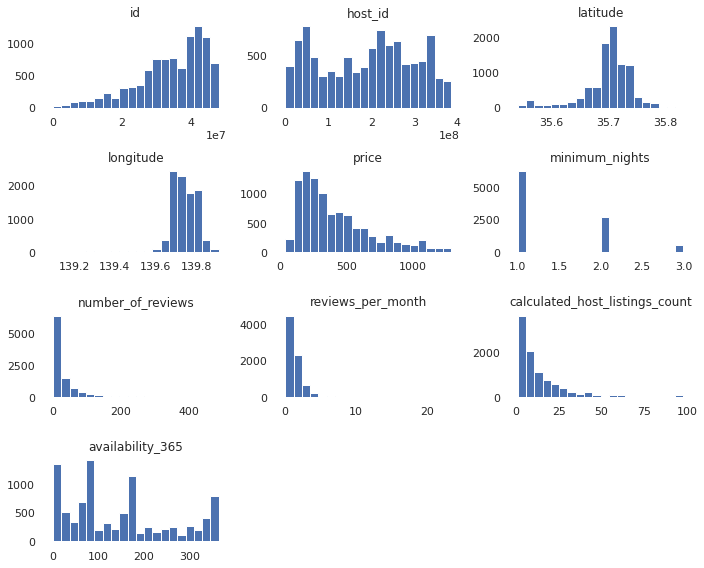

In [18]:
# Plotando o histograma novamente.
fig, ax = plt.subplots()
sns.set_style('white')

df_clean.hist(bins=20, grid=False, ax=ax)

sns.despine(left=True, bottom=True)

plt.tight_layout()

Boxplot de `price` após a remoção dos outliers


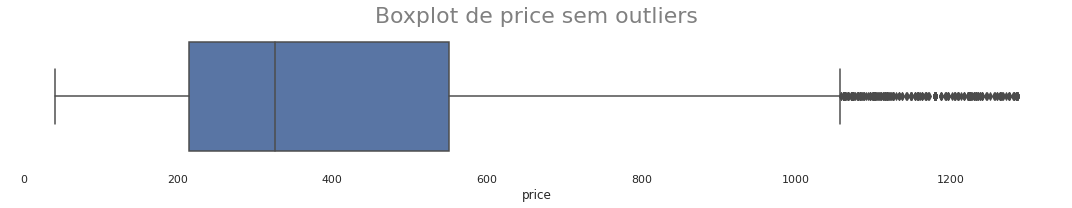

In [19]:
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df_clean['price'])
ax.set_title('Boxplot de price sem outliers', size=22, color='grey')

sns.despine(left=True, bottom=True)
plt.tight_layout()

Boxplot de `minimum_nights` após a remoção dos outliers

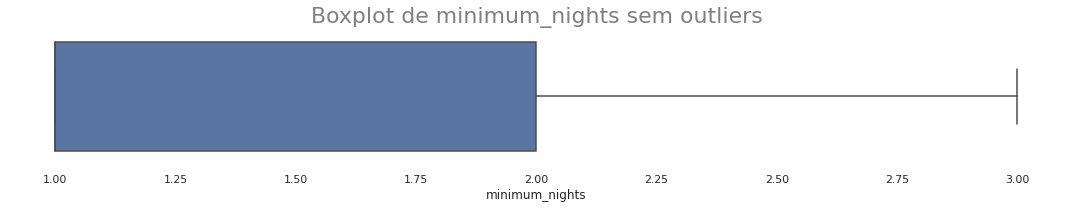

In [20]:
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df_clean['minimum_nights'])
ax.set_title('Boxplot de minimum_nights sem outliers', size=22, color='grey')

sns.despine(left=True, bottom=True)
plt.tight_layout()

### **Q4. Qual a correlação existente entre as variáveis**

A correlação expõe o quanto uma variável pode estar relacionada a outra, seja positivamente ou negativamente.

A função do coeficiente de correlação é estabelecer a __intensidade__ dessa relação.

Para identificar as correlações entre as variáveis, iremos:

* Gerar uma matriz de correlação
* Criar um *heatmap*(mapa de calor) usando a biblioteca `seaborn`

In [21]:
# Gerando a matriz de correlação
features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']

matriz_corr = df_clean[features].corr()

display(matriz_corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018520,0.006889,0.021284,-0.203939,-0.048922
minimum_nights,0.018520,1.000000,0.069410,-0.044864,-0.085901,0.048957
number_of_reviews,0.006889,0.069410,1.000000,0.676205,-0.156448,0.020606
reviews_per_month,0.021284,-0.044864,0.676205,1.000000,-0.149846,-0.026804
calculated_host_listings_count,-0.203939,-0.085901,-0.156448,-0.149846,1.000000,0.103683
availability_365,-0.048922,0.048957,0.020606,-0.026804,0.103683,1.000000


Para melhor visualizar a intensidade dessas relações, o gráfico de _heatmap_ é a melhor opção.

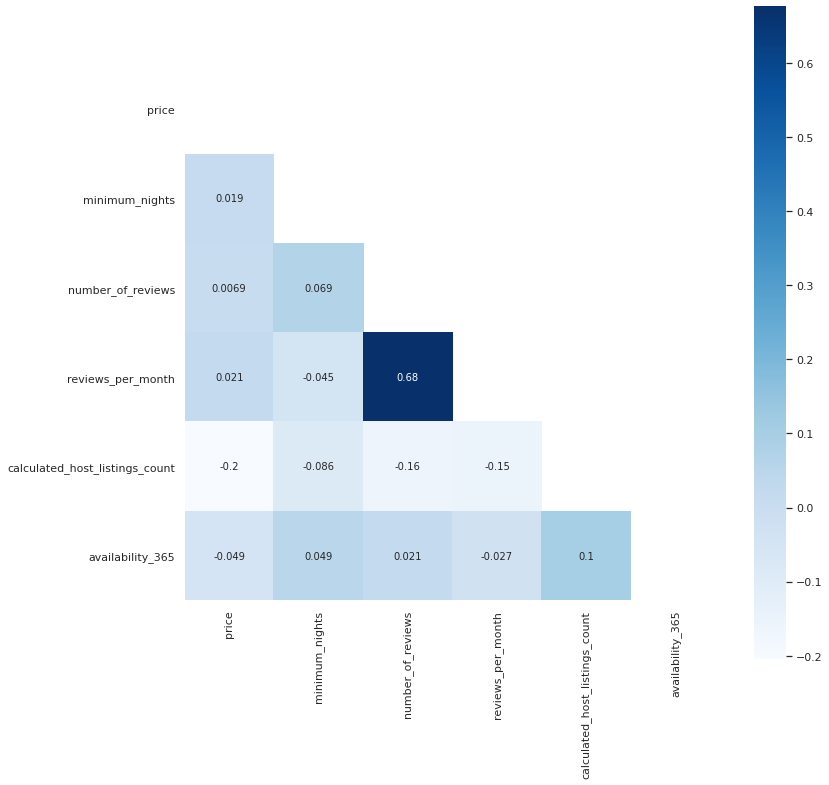

In [22]:
# Gerando um heatmap da matriz de correlação
figsize(12, 12)

mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

sns.heatmap(matriz_corr, cmap="Blues", mask=mask, square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Utilizando a função `value_counts()` do Pandas, é possível obter uma contagem dos valores de um atributo (_feature_).

Neste caso, usaremos o `value_counts()` na _feature_ `room_type` para descobrir qual o tipo de imóvel mais alugado do Airbnb de Tóquio.

In [23]:
# Quantidade de cada tipo de alocação anunciada
df_clean.room_type.value_counts()

Entire home/apt    6570
Private room       2111
Hotel room          397
Shared room         383
Name: room_type, dtype: int64

In [24]:
# Porcentagem de cada tipo de alocação anunciada
(df_clean.room_type.value_counts() / df_clean.shape[0]).round(4)*100

Entire home/apt    69.44
Private room       22.31
Hotel room          4.20
Shared room         4.05
Name: room_type, dtype: float64

Visualizando graficamente essa contagem.

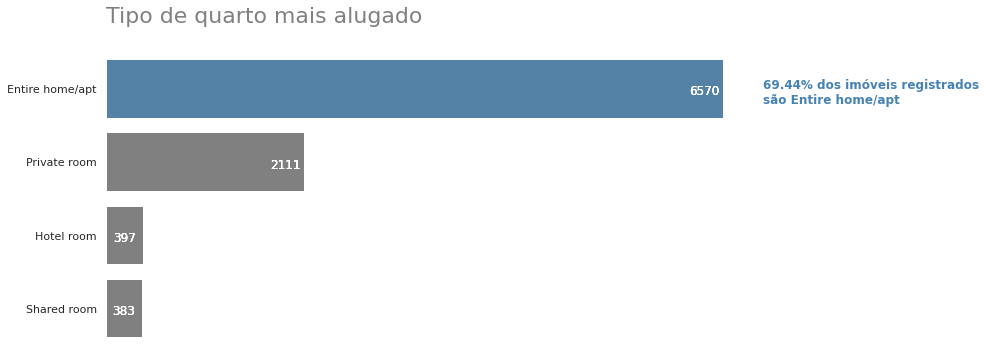

In [25]:
fig, ax = plt.subplots(figsize=(14,5))

indices = df_clean['room_type'].value_counts().index
valores = df_clean['room_type'].value_counts().values

bar_colors = ['grey' if (x < max(valores)) else 'steelblue' for x in valores]

splot = sns.barplot(x=valores, y=indices, palette=bar_colors, data=df_clean, ax=ax)

for p in splot.patches:

    # p.set_color('grey')
    for p in splot.patches:
        width=int(p.get_width())
        plt.text(p.get_width()-200, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='white', size=12, fontweight='light')

sns.despine(left=True, bottom=True)
ax.set_title('Tipo de quarto mais alugado\n', size=22, color='Grey', loc='left')
ax.text(7000, 0.2, '69.44% dos imóveis registrados\nsão Entire home/apt', size=12, color='Steelblue', fontweight='heavy')
ax.set_xlim([0,9000])


ax.xaxis.set_visible(False)
plt.tight_layout()

O tipo de imóvel mais alugado no Airbnb de Tóquio é `Entire home/apt` com 6570 registros, cerca de 69.44% dos imóveis alugados.

### **Q6. Qual a localidade mais cara de Tóquio?**



Usando o método `groupby()` podemos agrupar o dataset em função de um atributo. No caso, queremos comparar os bairros (_neighbourhoods_) a partir do preço médio de locação.

In [26]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hinohara Mura    750.670241
Okutama Machi    596.961573
Minato Ku        508.453823
Musashino Shi    498.337802
Shibuya Ku       478.087795
Chiyoda Ku       463.459611
Mitaka Shi       456.501340
Edogawa Ku       452.903350
Meguro Ku        448.772118
Shinjuku Ku      444.471449
Name: price, dtype: float64

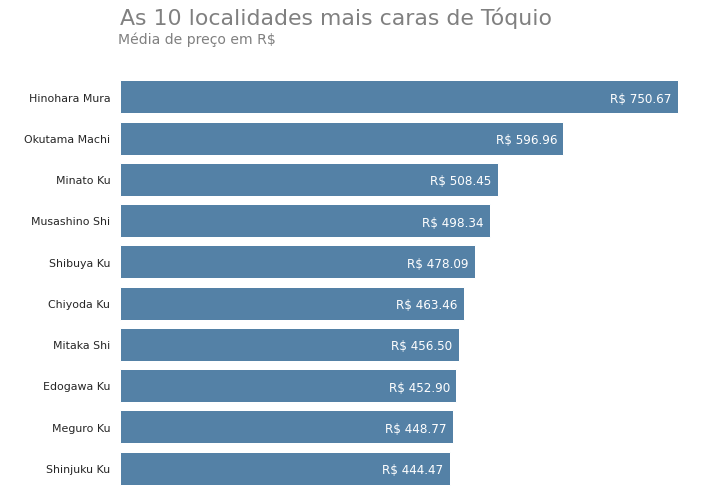

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


ax.set_title("As 10 localidades mais caras de Tóquio\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMédia de preço em R$", x=0.278, y=0.960, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-50, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

Aparentemente `Hinohara Mura` está com a média de preço acima das demais regiões.

Verificaremos se isso pode ser um caso de uma amostra não-representativa observando a quantidade de locações registradas para essa região.

Uma das formas de fazer uma busca em um _dataset_ é usando o método `.query()`
que funciona como uma _query_ em SQL, usaremos esse método para procurar as locações por bairros e fazer uma contagem da quantidade de locações registradas para o respectivo local.


In [28]:
# Quantidade de locações registradas em Hinohara Mura
print("Total de Registros: ",df_clean.query("neighbourhood == 'Hinohara Mura'").shape[0])

# Verificando os dados de Hinohara Mura
df_clean.query("neighbourhood == 'Hinohara Mura'")[['neighbourhood', 'price']]

Total de Registros:  2


,neighbourhood,price
967,Hinohara Mura,268.096515
1209,Hinohara Mura,1233.243968


`Hinohara Mura` possui apenas duas locações registradas para essa área, com preços **R\$268.09** e **R$1233.24**, respectivamente. <br>
Com esses valores, a região pode assumir uma média maior do que a região que seja realmente a mais cara.

In [29]:
# Quantidade de locações registradas em Okutama Machi
print("Total de Registros: ",df_clean.query("neighbourhood == 'Okutama Machi'").shape[0])

# Verificando os dados de Okutama Machi
df_clean.query("neighbourhood == 'Okutama Machi'")[['neighbourhood', 'price']]


Total de Registros:  6


,neighbourhood,price
1739,Okutama Machi,1233.243968
8028,Okutama Machi,268.096515
8549,Okutama Machi,1286.863271
11110,Okutama Machi,182.305630
11112,Okutama Machi,182.305630
11115,Okutama Machi,428.954424


A média realmente parece diminuir a medida que mais registros vão aparecendo por região.

In [30]:
# Quantidade de locações registradas em Minato Ku
print("Total de Registros: ",df_clean[df_clean.neighbourhood == "Minato Ku"].shape[0])

# Verificando os dados de Minato Ku
df_clean[df_clean.neighbourhood == "Minato Ku"][['neighbourhood', 'price']]

Total de Registros:  348


,neighbourhood,price
191,Minato Ku,1045.576408
194,Minato Ku,770.563003
215,Minato Ku,991.957105
250,Minato Ku,709.329759
255,Minato Ku,965.147453
...,...,...
11211,Minato Ku,383.002681
11212,Minato Ku,589.812332
11333,Minato Ku,259.839142
11334,Minato Ku,363.056300


Veremos os dados da região `Shibuya Ku`, que por sinal, se refere a um dos principais centros comerciais e financeiros do mundo.

In [31]:
# Quantidade de locações registradas em Shibuya Ku
print("Total de Registros: ",df_clean.query("neighbourhood == 'Shibuya Ku'").shape[0])
print("Preço Mínimo: R$",round(df_clean.query("neighbourhood == 'Shibuya Ku'")['price'].min(),2))
print("Preço Máximo: R$",round(df_clean.query("neighbourhood == 'Shibuya Ku'")['price'].max(),2))

# Verificando os dados de Shibuya Ku
df_clean.query("neighbourhood == 'Shibuya Ku'")[['neighbourhood', 'price']]

Total de Registros:  495
Preço Mínimo: R$ 107.24
Preço Máximo: R$ 1286.86


,neighbourhood,price
64,Shibuya Ku,766.380697
92,Shibuya Ku,273.994638
99,Shibuya Ku,176.193029
101,Shibuya Ku,428.954424
102,Shibuya Ku,160.857909
...,...,...
11234,Shibuya Ku,182.305630
11263,Shibuya Ku,303.324397
11336,Shibuya Ku,367.667560
11351,Shibuya Ku,248.900804


Com a suspeita de valores discrepantes, podemos fazer uma comparação da **média** com a **mediana** que nos fornecerá uma __medida de assimetria__ da distribuição, dessa forma, a média não deve ser muito distante de mediana.

Plotaremos então um novo gráfico com a __mediana__ do preço de cada bairro comparando com a __média__.

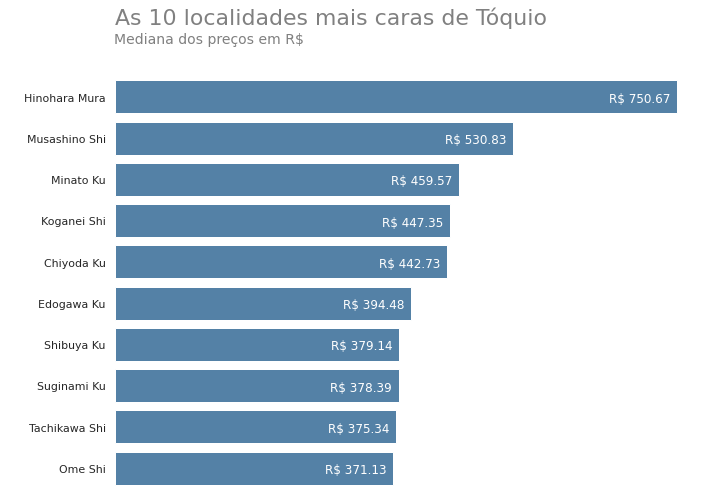

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]


ax.set_title("As 10 localidades mais caras de Tóquio\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMediana dos preços em R$", x=0.295, y=0.960, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-50, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

É interessante notar que, após usar a _mediana_, novas localizações surgiram como as mais caras, como:
* `Koganei Shi`
* `Suginami Ku`
* `Tachikawa Shi`
* `Ome Shi` 

In [33]:
# Gerando lista com o nome dos bairros com as 10 maiores médias e medianas
media_lista = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).index[:10]
mediana_lista = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False).index[:10]

# Gerando uma lista com a diferença dos nomes dos bairros
diferenca_lista = set(mediana_lista) - set(media_lista)
print(diferenca_lista)

{'Ome Shi', 'Tachikawa Shi', 'Suginami Ku', 'Koganei Shi'}


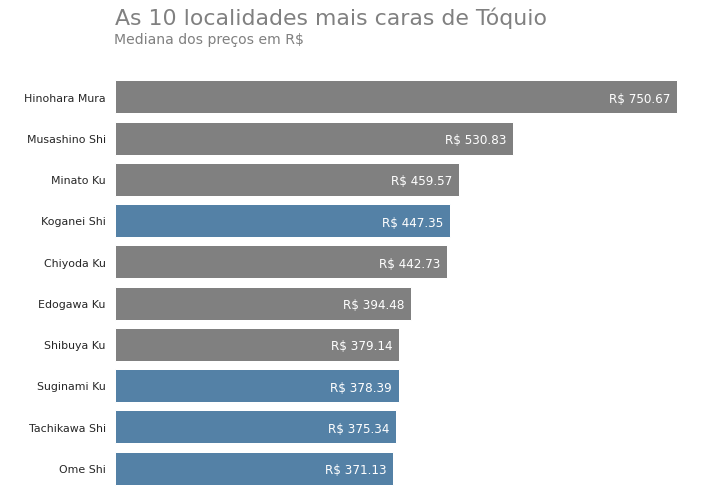

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]
bar_colors = ['Steelblue' if (x in diferenca_lista) else 'grey' for x in mediana_lista]

ax.set_title("As 10 localidades mais caras de Tóquio\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMediana dos preços em R$", x=0.295, y=0.960, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    palette=bar_colors,
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-50, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

Comparando a média de preços com a mediana de preços

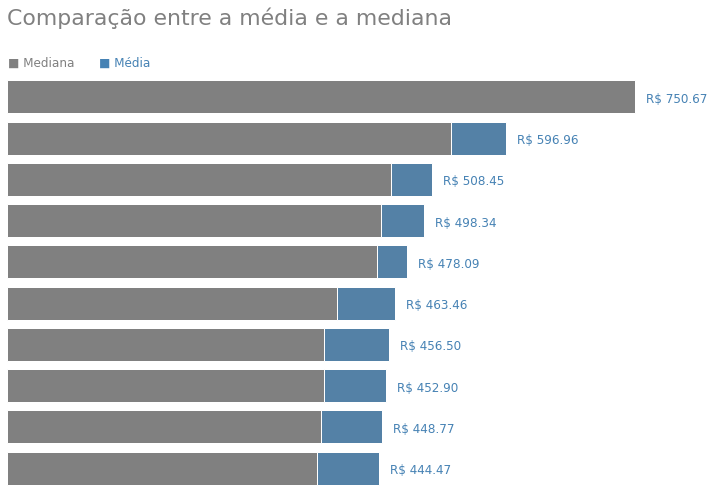

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))

mediana_preco = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]
media_preco = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax.set_title("Comparação entre a média e a mediana\n\n", size=22, color='grey', loc='left')
plt.suptitle("\n■ Mediana", x=0.062, y=0.910, size=12, color='grey', fontweight='light',)
plt.text(x=110, y=-0.75, s="\n■ Média", size=12, color='Steelblue', fontweight='light',)
#plt.suptitle("\n■ Média", x=0.350, y=0.960, size=14, color='Steelblue', fontweight='light',)

# Media
splot = sns.barplot(x=media_preco.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()+50, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='steelblue', size=12)
    

sns.barplot(x=mediana_preco.values, 
                    y=data_plot.index, 
                    color='grey',
                    ax=ax)



    
sns.despine(left=True, bottom=True)

plt.tight_layout()



Como podemos ver, alguns valores mais altos distorcem a média de preços, deixando-as um pouco mais caras que a mediana, levando em consideração apenas os preços mais caros, sem contar com os novos registros que apareceram quando usamos a mediana como medida.

Vale ressaltar que a média e a mediana mais cara, continuou sendo a região de `Hinohara Mura`, porque nesta região há apenas 2 registros, fazendo com que a média e a mediana tenham o mesmo valor.

Por fim, no gráfico abaixo é mostrado a quantidade total de registros feitos para cada bairro.


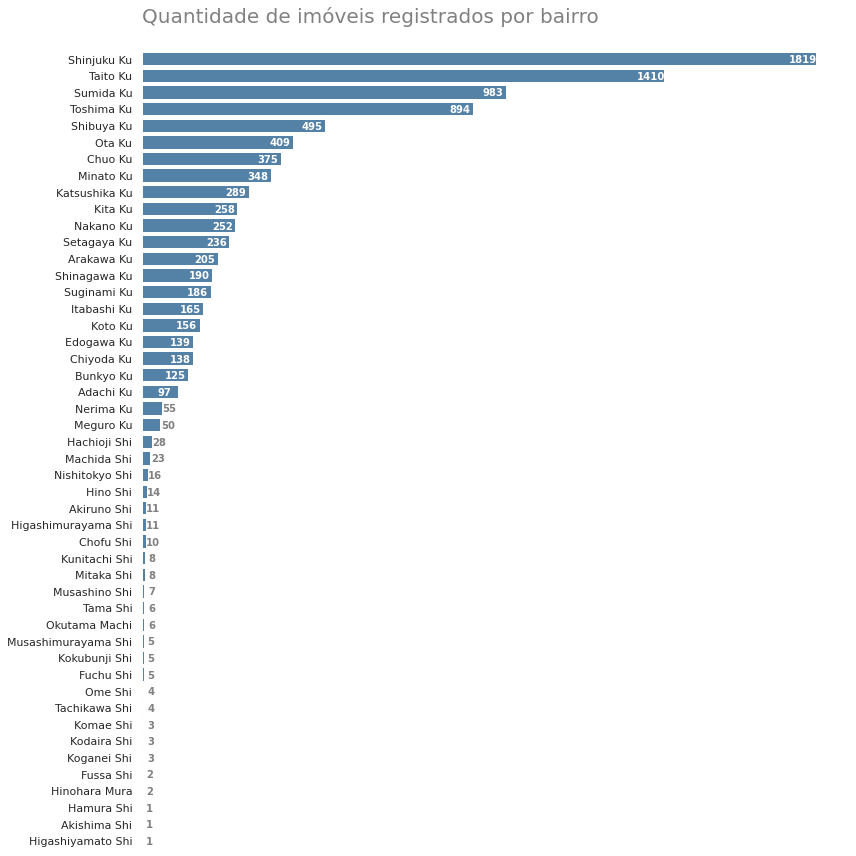

In [36]:
fig, ax = plt.subplots(figsize=(12,12))

neighbourhood_count = df_clean['neighbourhood'].value_counts(ascending=False)

splot = sns.barplot(x=neighbourhood_count.values, y=neighbourhood_count.index, color='steelblue', ax=ax)

for p in splot.patches:
    width=int(p.get_width())
    if width <= 70:
        plt.text(p.get_width()+20, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='grey', fontweight='bold')
        
    elif width > 70:
        plt.text(p.get_width()-35, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='white', fontweight='bold')
        


# sns.barplot(x=nei)
ax.set_title('Quantidade de imóveis registrados por bairro\n', loc='left', size=20, color='grey')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)

plt.tight_layout()

Como observado, as regiões com os menores números de registros aparecem mais vezes como as mais caras, como é o caso de `Hinohara Mura`, `Koganei Shi`, `Okutama Machi`, `Musashino Shi`, `Mitaka Shi`

Já a região de `Shinjuku Ku` que possui o maior registro com 1819 locações, aparece em 10º lugar nas localidades com a média de preços mais caras.

Como temos a informação sobre a Latitude e Longitude dos imóveis, podemos plotar cada ponto levando em consideração `x=longitude` e `y=latitude` e assim teremos um mapa de Tóquio onde podemos identificar a localização das casas e seus `price` e possível "_outliers_" de localizações.

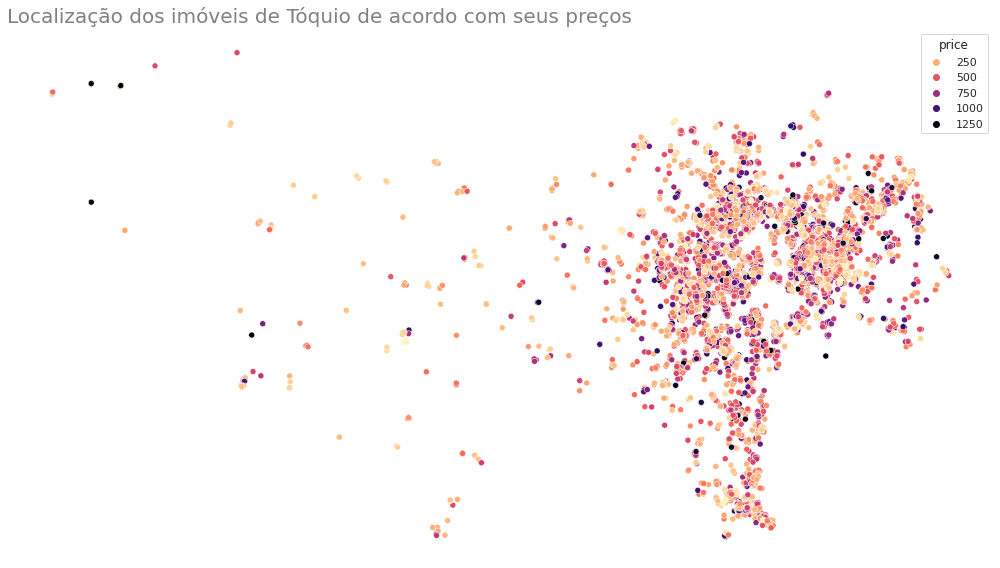

In [37]:
# Plotando um gráfico dos imóveis pela latitude-longitude e diferenciando por preço
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x="longitude", y="latitude", data=df_clean, hue="price", palette="magma_r")
ax.set_title("Localização dos imóveis de Tóquio de acordo com seus preços", size=20, loc='left', color='grey')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


plt.tight_layout()

Apesar da maiorias dos pontos estarem aglomerados no centro de Tóquio, alguns pontos começam a se distanciar bastante dessa concentração.
Para averiguar melhor onde esses pontos se localizam, podemos usar a biblioteca [__`folium`__](https://python-visualization.github.io/folium/), que nos permite plotar um mapa interativo para a melhor visualização de mapas.

O dataset que usamos nos fornece as coordenadas de cada locação registrada, dessa forma as usaremos para criar os pontos no mapa.

Primeiro, precisamos instalar a biblioteca `folium` com o seguinte comando.

In [38]:
# Instalando o folium para plot do mapa
!pip install folium -q

In [39]:
# Importando o folium
import folium

print(folium.__version__)

0.8.3


Fazendo uma pesquisa rápida, descobrimos que a latitude e longitude de Tóquio são `35.652832` e `139.839478`.

Precisamos passar essas coordenadas para plotar o mapa de Tóquio no Folium.

In [40]:
# Gerando o mapa de Tóquio

toquio = folium.Map(width="70%", height="70%",
                    location=[35.652832, 139.839478], 
                    tiles="Stamen Terrain", 
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
                    )

# Exibindo o mapa
toquio

<img alt="Mapa de Tóquio" width="100%" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/mapa_toquio.png">

Com o mapa funcionando, agora devemos criar uma lista com os valores de `latitude` e `longitude` de cada registro do dataset para plotar cada ponto no mapa.

In [41]:
# Gerando uma lista com a latitude e longitude dos imóveis do Airbnb de Tóquio

coords = []

for lat, lng in zip(df_clean.latitude.values, df_clean.longitude.values):
    coords.append([lat, lng])

Adicionando as coordenadas dos imóveis no mapa, gerando um _heatmap_ mostrando a concentração de imóveis.

In [42]:
# Importando o módulo Heatmap
from folium.plugins import HeatMap

# Adicionando as coordenadas ao mapa
toquio.add_child(HeatMap(coords, blur=25, radius=20))

# Exibindo o mapa
toquio

<img alt="Mapa de Tóquio" width="100%" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/mapa_toquio_heatmap.png">

O _heatmap_ mostra que alguns pontos realmente estão fora da concentração de registros (_outliers_), entretanto ainda não podemos considerar esses pontos como _outliers_ pois se tratam de registros localizados em fazendas ou regiões rurais de Tóquio, o que poderia ser um erro de digitação na hora do registro ou simplesmente ser uma locação em área rural para as pessoas que desejam visitar a área rural/florestas de Tóquio ou até mesmo ficar um pouco mais distante da cidade durante a noite,

## Conclusões


Mesmo usando a versão resumida de um _dataset_ maior, pode-se extrair _insights_ interessantes a respeito dos dados tais como:
* Presença de _outliers_ em alguns atributos;
* A quantidade de imóveis disponíveis em uma região interfere nas informações de outras _features_.

Evidenciamos a presença de valores discrepantes nos atributos `price` e `minimum_nights`, onde esses valores não correspondiam com a realidade.

Fizemos um tratamento e limpeza desses dados usando o `IQR Score` para definir quais valores são discrepantes antes de podermos fazer a análise dos dados.

Alguns atributos do dataset estavam totalmente sem registros alguns ou com registros faltantes, porém, estes não foram tão importantes para o foco desta análise e logo não foram utilizados.

Observamos que o tipo de quarto mais alugado é `Entire home/apt` que em tradução `Casa inteira/apartamento`.

Já para as localidades mais caras do Airbnb de Tóquio, pudemos evidenciar algumas distorcões nos preços devido a quantidade de registros para aquela região, pois, dependendo da quantidade de registros, a média de preço sobe bastante em relação as outras, como foi o caso do bairro `Hinohara Mura`, que com apenas 2 registros, aparece como a localidade mais cara do **Airbnb de Tóquio**.

Devemos ressaltar a importância de tratar e analisar bem os dados e não tomar decisões apenas nos dados estatísticos mostrados, como por exemplo se basear na média pois a mesma é sensível a _outliers_ que podem não condizer com a realidade.

Por se tratar de uma _dataset_ menor, foi feita uma análise superficial dessa base de dados resumida. Recomenda-se que, futuramente, seja feita uma análise exploratória mais detalhada usando o conjunto de dados completo, contendo 106 _features_ (atributos).